# Feature Engineering of Model and SubModel
Natural Language Processing (NLP), is a field within artificial intelligence that explores the interaction between machines and human languages.

For accurate analysis of text data, it's essential for machine learning models to identify structures within the text, such as individual words and their linguistic components. This is achieved through a process called tokenization, where the corpus is segmented into meaningful linguistic units, such as words or sentences, and stored as a list. These individual elements are referred to as tokens.

Certain cleaning and preparation techniques, such as lemmatization, removing stop words, and eliminating punctuation marks, are not employed in this project as they are deemed unnecessary.

#### Import Modules

In [1]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

#### Read DataFrame
CLEAN_All_DATA_VEC has been modified from CLEAN_All_DATA, refer to the function "text_cleaner" as well

df['Model_SubModel']     = df['Model'].astype(str) + ' ' + df['SubModel'].astype(str)

df['Model_SubModel']     = df['Model_SubModel'] .apply(text_cleaner)

In [2]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')

X_train, X_test, y_train, y_test, X_aim            = CLEAN_All_DATA_VEC(df, X_aim)
X_train_copy, X_test_copy, X_aim_copy, cat_cols_FE = Kmeans_FE(X_train, X_test, X_aim, cat_cols)

In [3]:
X_train_copy.head(3)

,Auction,VehYear,VehicleAge,Make,Trim,Color,Transmission,WheelType,VehOdo,Nationality,...,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Model_SubModel,PurchDate_year,PurchDate_month,PurchDate_dayofweek,TransactionCluster
21430,OTHER,2004,5,CHEVROLET,LS,GREEN,AUTO,Covers,71041,AMERICAN,...,39208,MS,4700.0,0,4622,passenger venture fwd 34l v6,2009,6,3,3
53433,OTHER,2007,2,KIA,Bas,SILVER,AUTO,Covers,63941,OTHER ASIAN,...,80229,CO,5255.0,0,533,sedan i4 rio mpi 16l 4d,2009,9,3,2
13278,OTHER,2006,3,PONTIAC,Bas,WHITE,AUTO,Alloy,74180,AMERICAN,...,95673,CA,7305.0,0,1272,sedan 35l g6 sfi v6 4d,2009,7,1,5


The following section is not necessary, as it will be integrated into the pipeline. However, if it's not integrated, it's important to track the decomposition of the "Model" and "Submodel":
---> Decompose 'Model' and 'Submodel' columns for tracking purposes

This section decomposes the "Model" and "Submodel" columns into a single column named "Model_Submodel" for tracking purposes. If this decomposition is not integrated into the pipeline, it can be useful to maintain visibility on the individual components of the "Model" and "Submodel" columns.

In [4]:
# count_vectorizer   = CountVectorizer()
# features_bow       = count_vectorizer.fit_transform(X_train_copy['Model_SubModel'])
# bow_names          = count_vectorizer.get_feature_names_out()  
# df_bow             = pd.DataFrame(features_bow.toarray(), columns = bow_names).astype('category')
# X_train_copy       = pd.concat([X_train_copy, df_bow], axis=1)

# X_train_copy.drop(['Model_SubModel'], axis = 1 , inplace = True)  

In [5]:
# features_bow_test       = count_vectorizer.transform(X_test_copy['Model_SubModel'])  
# df_bow_test             = pd.DataFrame(features_bow_test.toarray(), columns = bow_names).astype('category')
# X_test_copy             = pd.concat([X_test_copy, df_bow_test], axis=1)
# X_test_copy.drop(['Model_SubModel'], axis = 1 , inplace = True)  

In [4]:
cat_cols = ['Auction'       ,'VehicleAge'      , 'Make'                 , 'WheelType', 'VehYear',
            'Trim'          ,'Color'           , 'Transmission'         ,  # 'SubModel', 'Model',
            'Nationality'   ,'Size'            , 'TopThreeAmericanName' , 'IsOnlineSale',
            'PRIMEUNIT'     ,'AUCGUART'        , 'BYRNO' , 'VNZIP1'     , 'VNST', 
            'PurchDate_year','PurchDate_month' , 'PurchDate_dayofweek'  , 'VehYear']

### The Bag of Words method


In [5]:
from   sklearn.feature_extraction.text import CountVectorizer

In [6]:

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                     ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                              ('nlp', CountVectorizer(), 'Model_SubModel')                    # The bag of words vectorizer 
                                              ])

rfc                       = RandomForestClassifier(class_weight = 'balanced',
                                                   random_state = 442, 
                                                  )

pipeline_rfc              = Pipeline([('preprocessor', preprocessor),
                                      ('rfClassifier', rfc)
                                     ])

param_grid                = {
                            'rfClassifier__n_estimators'     : [89, 90, 91],  
                            'rfClassifier__max_depth'        : [40, 41, 42],  
                            'rfClassifier__min_samples_leaf' : [3 , 4 , 5],     
                            'rfClassifier__min_samples_split': [5 , 6 , 7],     
                            }

model_rfc_grid = GridSearchCV(estimator    = pipeline_rfc, 
                              param_grid   = param_grid, 
                              scoring      = 'f1', 
                              cv           = 3,  
                              n_jobs       = -1 
                              )

In [7]:
model_rfc_grid.fit(X_train_copy, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCu...
                                                                          'PurchDate_dayofweek',
                                                                          'VehYear']),
                                                                        ('nlp',
                                                                         CountVectorizer(),
                                                                         'Model_SubModel')])),
                                       ('rfClassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=442))]),
             n_jobs=-1,
             param_grid={'rfClassifier__max_depth': [40, 41, 42],
                         'rfClassifier__min_samples_leaf': [3, 4, 5],
                         'rfClassifier__min_samples_split': [5, 6, 7],
                         'rfClassifier__n_estimators': [89, 90, 91]},
             scoring='f1')

In [8]:
optimised_model_rfc_estimator   = model_rfc_grid.best_estimator_
optimised_model_rfc_params      = model_rfc_grid.best_params_

pred_model_rfc_grid             = model_rfc_grid.predict(X_test_copy) 

f1_model_rfc_grid               = f1_score(y_test       , pred_model_rfc_grid)
recall_model_rfc_grid           = recall_score(y_test   , pred_model_rfc_grid)
precision_model_rfc_grid        = precision_score(y_test, pred_model_rfc_grid)
accuracy_model_rfc_grid         = accuracy_score(y_test , pred_model_rfc_grid)


grid_rfc_poly_pca_FE_metrics    = pd.DataFrame({
                                               'Model'    : ['GridSearch Optimised RFC with POLY/PCA FE'],
                                               'F1 Score' : [f1_model_rfc_grid],
                                               'Recall'   : [recall_model_rfc_grid],
                                               'Precision': [precision_model_rfc_grid],
                                               'Accuracy' : [accuracy_model_rfc_grid]
                                              })


print('Scoring of GridSearch Optimised RFC FE')
print('Optimised RFC POLY/PCA FE Model:'     , optimised_model_rfc_estimator)
print("Optimised RFC POLY/PCA FE Parameters:", optimised_model_rfc_params)

Scoring of GridSearch Optimised RFC FE
Optimised RFC POLY/PCA FE Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice

Scoring of GridSearch RFC


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised RFC with POLY/PCA FE,0.417582,0.404255,0.431818,0.854617


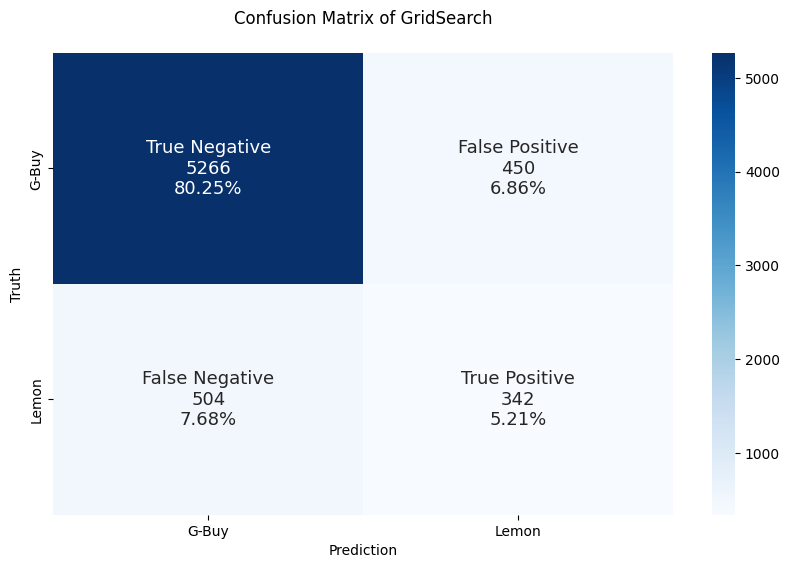

In [9]:
print('Scoring of GridSearch RFC')
display(grid_rfc_poly_pca_FE_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_model_rfc_grid, 'GridSearch');

---------------------------
---------------------------

### Support Vector Machines

In [36]:
# Support Vector Machines 

preprocessor = ColumnTransformer([
                                  ('num', StandardScaler(), num_cols),
                                  ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                  ('nlp', CountVectorizer(), 'Model_SubModel')])


svm_classifier = SVC(class_weight = 'balanced',
                     random_state = 42, 
                     )


pipeline_svm = Pipeline([
                        ('preprocessor' , preprocessor),
                        ('svmClassifier', svm_classifier)
                       ])


param_grid = {
             'svmClassifier__C'      : [2.3, 2.35,2.4,2.5],
             'svmClassifier__kernel' : ['rbf'],#  , 'poly', 'linear'
             'svmClassifier__gamma'  : ['scale', 'auto']
             }

model_svm_grid = GridSearchCV(pipeline_svm, 
                               param_grid   = param_grid, 
                               scoring      = 'f1', 
                               cv           = 3,  
                               n_jobs       = 8
                              )

In [37]:
model_svm_grid.fit(X_train_copy, y_train)  #sample(30000, random_state = 42)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCurrentAuctionAveragePrice',
                                                                          'MMRCurrentAuctionCleanPrice',
                                                                          'MMRCurrentRetailAveragePrice',
                                                                          'MM...
                                                                          'AUCGUART',
                                                                          'BYRNO',
                                                                          'VNZIP1',
                                                                          'VNST',
                                                                          'PurchDate_year',
                                                                          'PurchDate_month',
                                                                          'PurchDate_dayofweek',
                                                                          'VehYear']),
                                                                        ('nlp',
                                                                         CountVectorizer(),
                                                                         'Model_SubModel')])),
                                       ('svmClassifier',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=8,
             param_grid={'svmClassifier__C': [2.3, 2.35, 2.4, 2.5],
                         'svmClassifier__gamma': ['scale', 'auto'],
                         'svmClassifier__kernel': ['rbf']},
             scoring='f1')

In [38]:
optimised_svm_grid   = model_svm_grid.best_estimator_
optimised_svm_params = model_svm_grid.best_params_

predictions_svm_grid = model_svm_grid.predict(X_test_copy)
# Model evaluation
f1_svm_grid          = f1_score(y_test       , predictions_svm_grid)
recall_svm_grid      = recall_score(y_test   , predictions_svm_grid)
accuracy_svm_grid    = accuracy_score(y_test , predictions_svm_grid)
precision_svm_grid   = precision_score(y_test, predictions_svm_grid)


grid_svm_metrics     = pd.DataFrame({
                                    'Model'    : ['GridSearch Optimised SVM'],
                                    'F1 Score' : [f1_svm_grid],
                                    'Recall'   : [recall_svm_grid],
                                    'Precision': [precision_svm_grid],
                                    'Accuracy' : [accuracy_svm_grid]
                                    })

# Print Results
print("Optimised SVM Model: ", optimised_svm_grid, '\n\n')
print('-- '*30)
print("Optimised SVM Parameters: ", optimised_svm_params)

Optimised SVM Model:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
                                                   'MMRCurrentRetailAveragePrice',
                                                   'MMRCurrentRetailCleanPrice',
                                                   'V...
                                                   'Make', 'WheelType',
                                                   'VehYear', 'Tri

Scoring of SVM Classifier


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised SVM,0.401104,0.515366,0.328313,0.801585


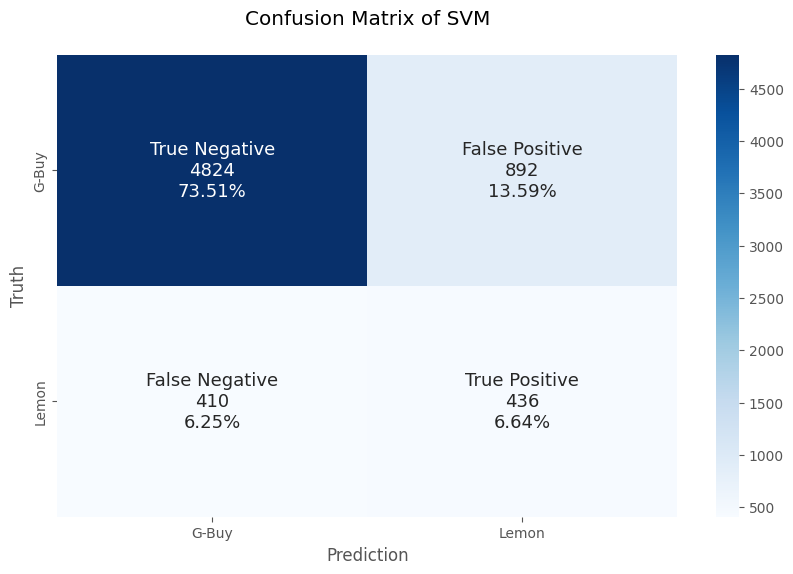

In [39]:
print('Scoring of SVM Classifier')
display(grid_svm_metrics.style.hide())
Confusion_Matrix_Func(y_test, predictions_svm_grid, 'SVM');

-----------------------------


### Logistic Regression with Over Sampling and Bag of Words

In [16]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

ratio = {1:n_pos * 3, 0:n_neg}
ROS  = RandomOverSampler(sampling_strategy= ratio, random_state= 42)

X_train_rs, y_train_rs = ROS.fit_resample(X_train_copy, y_train)

In [17]:
num_pipeline   = Pipeline([('scaler', StandardScaler()),
                           ('pca'   , PCA(n_components=0.99))
                         ])

preprocessor   = ColumnTransformer([('num', num_pipeline, num_cols),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                    ('nlp', CountVectorizer(), 'Model_SubModel')])

model_lr       = LogisticRegression(solver       = 'saga', 
                                    max_iter     =  2000, 
                                  # class_weight = 'balanced', 
                                    random_state = 42)

pipeline_lr_im_grid    = Pipeline([('preprocessor', preprocessor),
                                   ('logisticRegr', model_lr)
                                  ])
# ----------------------------------------------------------------------------------------
param_grid     = {'logisticRegr__C'      : [0.184, 0.185, 0.186, 0.19, 0.25],
                  'logisticRegr__penalty': ['l2']      #  penalty --> can be added 'elasticnet'
                  }

model_lr_im_grid = GridSearchCV(estimator  = pipeline_lr_im_grid, 
                                param_grid = param_grid, 
                                scoring    = 'f1',
                                cv         = 3, 
                                n_jobs     = 8
                               )

In [18]:
model_lr_im_grid.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCurrentAuctionAveragePrice',
                                                                          'MMR...
                                                                          'PRIMEUNIT',
                                                                          'AUCGUART',
                                                                          'BYRNO',
                                                                          'VNZIP1',
                                                                          'VNST',
                                                                          'PurchDate_year',
                                                                          'PurchDate_month',
                                                                          'PurchDate_dayofweek',
                                                                          'VehYear']),
                                                                        ('nlp',
                                                                         CountVectorizer(),
                                                                         'Model_SubModel')])),
                                       ('logisticRegr',
                                        LogisticRegression(max_iter=2000,
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=8,
             param_grid={'logisticRegr__C': [0.184, 0.185, 0.186, 0.19, 0.25],
                         'logisticRegr__penalty': ['l2']},
             scoring='f1')

In [19]:
# Extract the best estimator
optimised_lr_im_grid    = model_lr_im_grid.best_estimator_
optimised_lr_im_params  = model_lr_im_grid.best_params_

# Evaluate the Model
pred_lr_im_grid      = optimised_lr_im_grid.predict(X_test_copy)
f1_lr_im_grid        = f1_score(y_test       , pred_lr_im_grid)
recall_lr_im_grid    = recall_score(y_test   , pred_lr_im_grid)
precision_lr_im_grid = precision_score(y_test, pred_lr_im_grid)
accuracy_lr_im_grid  = accuracy_score(y_test , pred_lr_im_grid)

grid_lr_im_metrics = pd.DataFrame({
                                'Model'    : ['GridSearch Optimised LR (IM-Learn)'],
                                'F1 Score' : [f1_lr_im_grid],
                                'Recall'   : [recall_lr_im_grid],
                                'Precision': [precision_lr_im_grid],
                                'Accuracy' : [accuracy_lr_im_grid]
                               })

print('Scoring of GridSearch Optimised LR Classifier IM-Learn')
print('Optimised LR Model:'     , optimised_lr_im_grid)
print("Optimised LR Parameters:", optimised_lr_im_params)

Scoring of GridSearch Optimised LR Classifier IM-Learn
Optimised LR Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanP

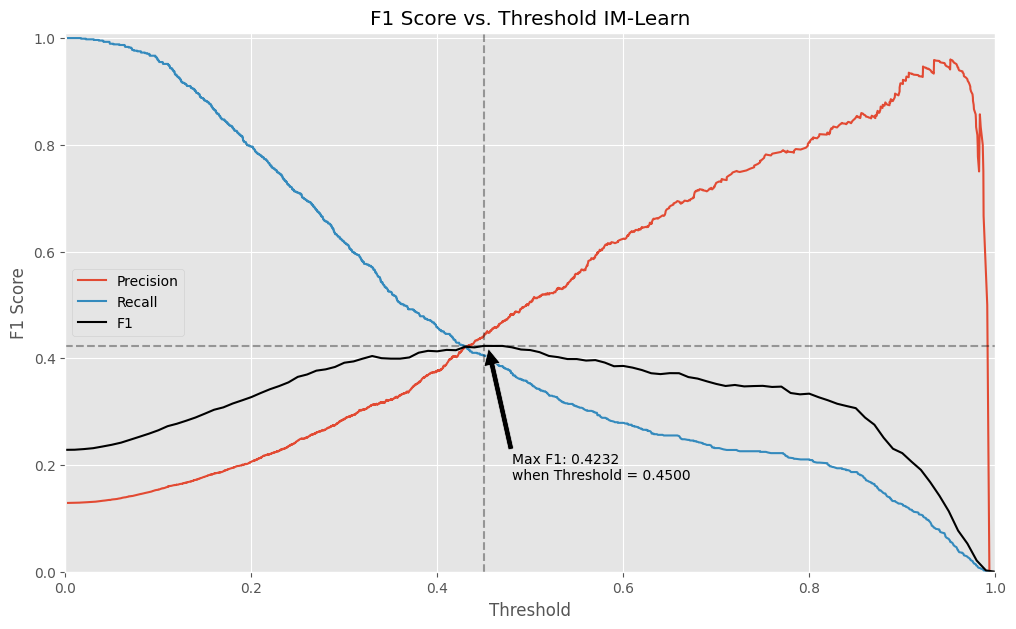

In [20]:
# Find the f1 score for each threshold 
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize= (12,7))

p_curve, r_curve, t_curve =  precision_recall_curve(y_test, model_lr_im_grid.predict_proba(X_test_copy)[:,1])
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
# -------------------------------------------------------------------------------------------------

f1_im = []
threshold = np.linspace(0,1,101)
for level in threshold:
    y_pred  = model_lr_im_grid.predict_proba(X_test_copy)[:,1] > level
    f1_im.append(f1_score(y_test, y_pred))
# --------------------------------------------------------------
    
max_f1_im_index     = np.argmax(f1_im)
max_f1_im_threshold = threshold[max_f1_im_index]
max_f1_im_value     = f1_im[max_f1_im_index]
#---------------------------------------------------------------

sns.lineplot(x   = threshold, y =f1_im, label = 'F1', color = 'black')
# plt.scatter([max_f1_threshold], [f1[max_f1_index]], marker='o', s = 175, color='blue', alpha=0.2, label='Max F1')
plt.axvline(x = max_f1_im_threshold, linestyle='--', color = 'black', alpha = 0.35)
plt.axhline(y = f1_im[max_f1_im_index], linestyle='--', color='black'  , alpha=0.35)


plt.annotate(f'Max F1: {max_f1_im_value:.4f} \nwhen Threshold = {max_f1_im_threshold:.4f}', 
             xy         = (max_f1_im_threshold + 0.005, max_f1_im_value - 0.005),
             xytext     = (max_f1_im_threshold + 0.03, max_f1_im_value - 0.25),
             arrowprops = dict(facecolor='black'),
             )


plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold IM-Learn')
ax.set_xlim(left   = 0, right = 1)
ax.set_ylim(bottom = 0, top = 1.01);

Scoring of Logistic Regression Classifier IM-Learn with 45.00% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.423196,0.405437,0.442581,0.857513


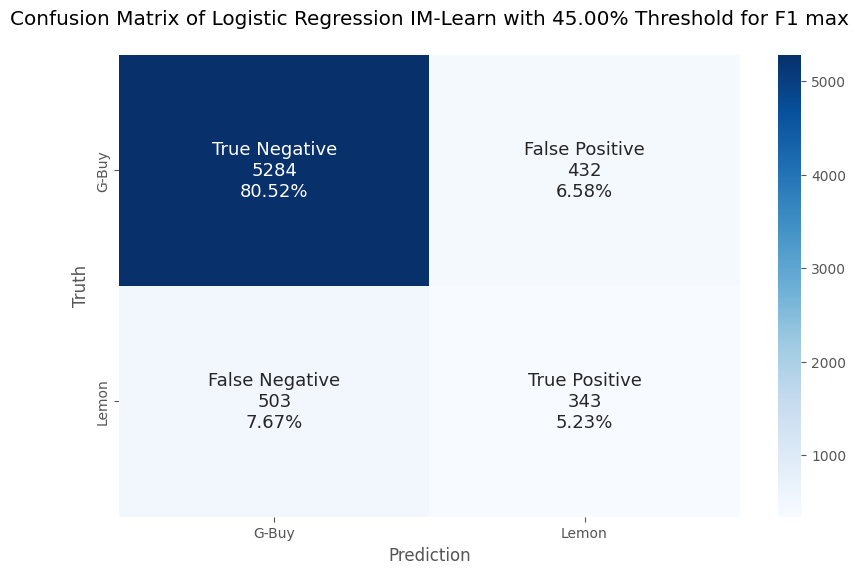

In [21]:
# Evaluate the model:
pred_proba_lr_im_grid_f1max  = model_lr_im_grid.predict_proba(X_test_copy)[:,1] > max_f1_im_threshold    # 0.434 #    
f1_lr_im_grid_f1max         = f1_score(y_test       , pred_proba_lr_im_grid_f1max)
recall_lr_im_grid_f1max     = recall_score(y_test   , pred_proba_lr_im_grid_f1max)
precision_lr_im_grid_f1max  = precision_score(y_test, pred_proba_lr_im_grid_f1max)
accuracy_lr_im_grid_f1max   = accuracy_score(y_test , pred_proba_lr_im_grid_f1max)


grid_lr_im_metrics_f1max    = pd.DataFrame({
                                    'Model'    : ['Logistic Regression'],
                                    'F1 Score' : [f1_lr_im_grid_f1max],
                                    'Recall'   : [recall_lr_im_grid_f1max],
                                    'Precision': [precision_lr_im_grid_f1max],
                                    'Accuracy' : [accuracy_lr_im_grid_f1max]
                                    })
# --------------------------------------------------------------------                                
print(f'Scoring of Logistic Regression Classifier IM-Learn with {max_f1_im_threshold:.2%} Threshold')
display(grid_lr_im_metrics_f1max.style.hide())
Confusion_Matrix_Func(y_test, pred_proba_lr_im_grid_f1max, f'Logistic Regression IM-Learn with {max_f1_im_threshold:.2%} Threshold for F1 max');

---------------------

-----------------------


### The Term Frequency - Inverse Document Frequency
The Term Frequency-Inverse Document Frequency (TF-IDF) vectorization method considers the relevance of a word within a corpus. Words that appear frequently across multiple documents are assigned lower TF-IDF values, as they are less effective in distinguishing between different types of text. Conversely, words that occur rarely in the entire corpus are considered more important, resulting in higher TF-IDF values.
In essence, TF-IDF helps prioritize words that are unique or rare within the corpus, as they are more likely to carry meaningful information and contribute to the differentiation between text types.

### Logistic Regression with Over Sampling and TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

ratio = {1:n_pos * 3, 0:n_neg}
ROS  = RandomOverSampler(sampling_strategy= ratio, random_state= 42)

X_train_rs, y_train_rs = ROS.fit_resample(X_train_copy, y_train)

In [24]:
num_pipeline   = Pipeline([('scaler', StandardScaler()),
                           ('pca'   , PCA(n_components=0.99))
                         ])

preprocessor   = ColumnTransformer([('num', num_pipeline, num_cols),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                    ('nlp', TfidfVectorizer(), 'Model_SubModel')
                                   ])
                                   

model_lr_Tfidf = LogisticRegression(solver       = 'saga', 
                                    max_iter     =  2000, 
                                  # class_weight = 'balanced', 
                                    random_state = 42)

pipeline_lr_Tfidf_grid    = Pipeline([('preprocessor', preprocessor),
                                      ('logisticRegr', model_lr_Tfidf)
                                     ])
# ----------------------------------------------------------------------------------------
param_grid     = {'logisticRegr__C'      : [0.25, 0.3, 0.35, 0.4, 0.5],
                  'logisticRegr__penalty': ['l2']                   #  penalty --> can be added 'elasticnet'
                  }

model_lr_Tfidf_grid = GridSearchCV(estimator  = pipeline_lr_Tfidf_grid, 
                                   param_grid = param_grid, 
                                   scoring    = 'f1',
                                   cv         = 3, 
                                   n_jobs     = -1
                                  )

In [25]:
model_lr_Tfidf_grid.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCurrentAuctionAveragePrice',
                                                                          'MMR...
                                                                          'PRIMEUNIT',
                                                                          'AUCGUART',
                                                                          'BYRNO',
                                                                          'VNZIP1',
                                                                          'VNST',
                                                                          'PurchDate_year',
                                                                          'PurchDate_month',
                                                                          'PurchDate_dayofweek',
                                                                          'VehYear']),
                                                                        ('nlp',
                                                                         TfidfVectorizer(),
                                                                         'Model_SubModel')])),
                                       ('logisticRegr',
                                        LogisticRegression(max_iter=2000,
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logisticRegr__C': [0.25, 0.3, 0.35, 0.4, 0.5],
                         'logisticRegr__penalty': ['l2']},
             scoring='f1')

In [26]:
# Extract the best estimator
optimised_lr_Tfidf_grid    = model_lr_Tfidf_grid.best_estimator_
optimised_lr_Tfidf_params  = model_lr_Tfidf_grid.best_params_

# Evaluate the Model
pred_lr_Tfidf_grid         = optimised_lr_Tfidf_grid.predict(X_test_copy)
f1_lr_Tfidf_grid           = f1_score(y_test       , pred_lr_Tfidf_grid)
recall_lr_Tfidf_grid       = recall_score(y_test   , pred_lr_Tfidf_grid)
precision_lr_Tfidf_grid    = precision_score(y_test, pred_lr_Tfidf_grid)
accuracy_lr_Tfidf_grid     = accuracy_score(y_test , pred_lr_Tfidf_grid)

grid_lr_im_metrics         = pd.DataFrame({
                                        'Model'    : ['GridSearch Optimised LR (IM-Learn)'],
                                        'F1 Score' : [f1_lr_Tfidf_grid],
                                        'Recall'   : [recall_lr_Tfidf_grid],
                                        'Precision': [precision_lr_Tfidf_grid],
                                        'Accuracy' : [accuracy_lr_Tfidf_grid]
                                         })

print('Scoring of GridSearch Optimised LR Classifier IM-Learn')
print('Optimised LR Model:'     , optimised_lr_Tfidf_grid)
print("Optimised LR Parameters:", optimised_lr_Tfidf_params)

Scoring of GridSearch Optimised LR Classifier IM-Learn
Optimised LR Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanP

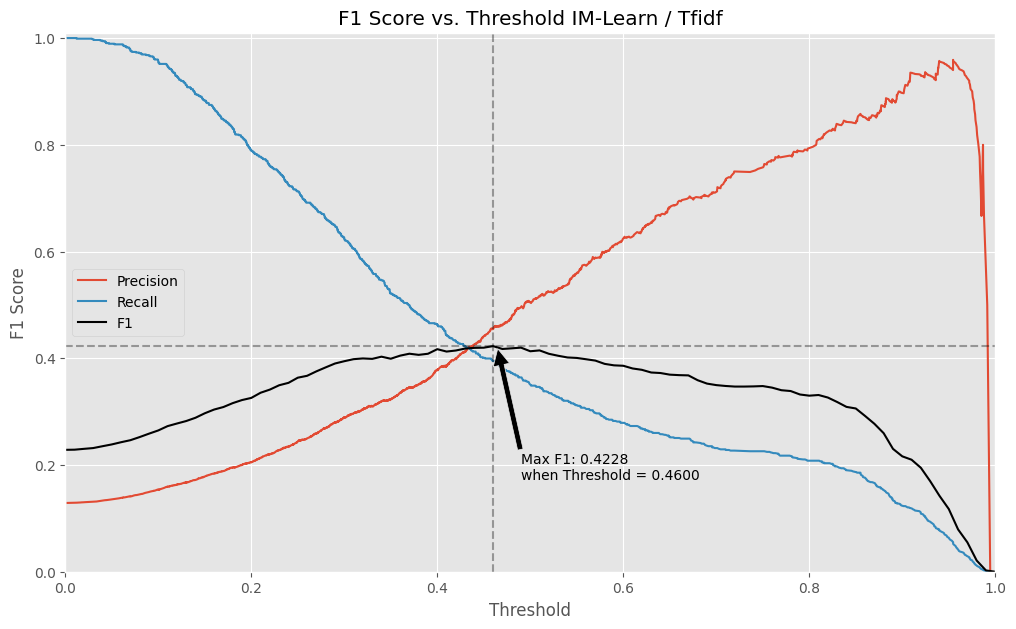

In [27]:
# Find the f1 score for each threshold 
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize= (12,7))

p_curve, r_curve, t_curve =  precision_recall_curve(y_test, model_lr_Tfidf_grid.predict_proba(X_test_copy)[:,1])
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
# -------------------------------------------------------------------------------------------------

f1_Tfidf = []
threshold = np.linspace(0,1,101)
for level in threshold:
    y_pred  = model_lr_Tfidf_grid.predict_proba(X_test_copy)[:,1] > level
    f1_Tfidf.append(f1_score(y_test, y_pred))
# --------------------------------------------------------------
    
max_f1_Tfidf_index     = np.argmax(f1_Tfidf)
max_f1_Tfidf_threshold = threshold[max_f1_Tfidf_index]
max_f1_Tfidf_value     = f1_Tfidf[max_f1_Tfidf_index]
#---------------------------------------------------------------

sns.lineplot(x = threshold, y =f1_Tfidf, label = 'F1'        , color = 'black')
plt.axvline(x  = max_f1_Tfidf_threshold, linestyle='--'      , color = 'black', alpha = 0.35)
plt.axhline(y  = f1_Tfidf[max_f1_Tfidf_index], linestyle='--', color='black'  , alpha=0.35)


plt.annotate(f'Max F1: {max_f1_Tfidf_value:.4f} \nwhen Threshold = {max_f1_Tfidf_threshold:.4f}', 
             xy         = (max_f1_Tfidf_threshold + 0.005, max_f1_Tfidf_value - 0.005),
             xytext     = (max_f1_Tfidf_threshold + 0.03, max_f1_Tfidf_value - 0.25),
             arrowprops = dict(facecolor='black'),
             )


plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold IM-Learn / Tfidf')
ax.set_xlim(left   = 0, right = 1)
ax.set_ylim(bottom = 0, top = 1.01);

Scoring of Logistic Regression Classifier IM-Learn / Tfidf with 46.00% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.422785,0.394799,0.455041,0.861018


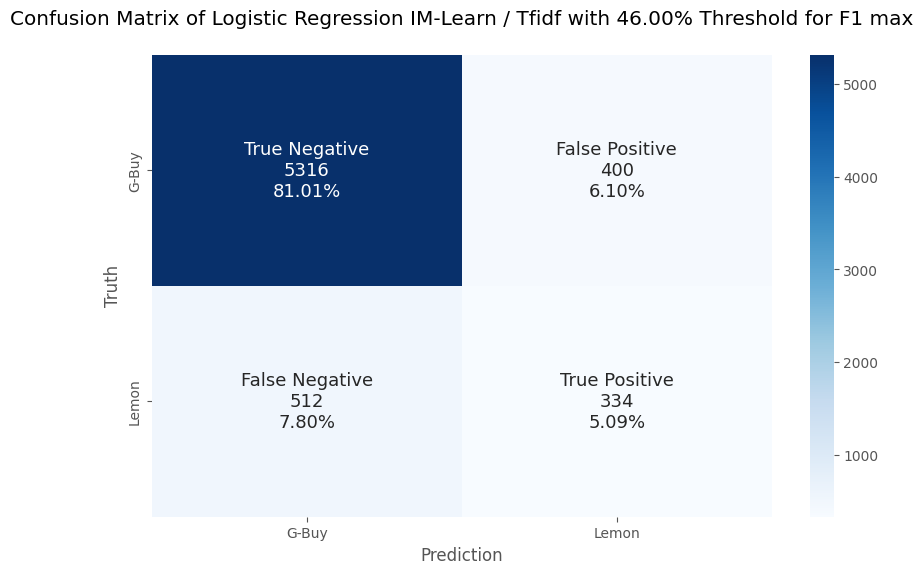

In [28]:
# Evaluate the model:
pred_proba_lr_Tfidf_grid_f1max  = model_lr_Tfidf_grid.predict_proba(X_test_copy)[:,1] > max_f1_Tfidf_threshold    # 0.434 #    
f1_lr_Tfidf_grid_f1max          = f1_score(y_test       , pred_proba_lr_Tfidf_grid_f1max)
recall_lr_Tfidf_grid_f1max      = recall_score(y_test   , pred_proba_lr_Tfidf_grid_f1max)
precision_lr_Tfidf_grid_f1max   = precision_score(y_test, pred_proba_lr_Tfidf_grid_f1max)
accuracy_lr_Tfidf_grid_f1max    = accuracy_score(y_test , pred_proba_lr_Tfidf_grid_f1max)


grid_lr_Tfidf_metrics_f1max    = pd.DataFrame({
                                            'Model'    : ['Logistic Regression'],
                                            'F1 Score' : [f1_lr_Tfidf_grid_f1max],
                                            'Recall'   : [recall_lr_Tfidf_grid_f1max],
                                            'Precision': [precision_lr_Tfidf_grid_f1max],
                                            'Accuracy' : [accuracy_lr_Tfidf_grid_f1max]
                                            })
# --------------------------------------------------------------------                                
print(f'Scoring of Logistic Regression Classifier IM-Learn / Tfidf with {max_f1_Tfidf_threshold:.2%} Threshold')
display(grid_lr_Tfidf_metrics_f1max.style.hide())
Confusion_Matrix_Func(y_test, pred_proba_lr_Tfidf_grid_f1max, f'Logistic Regression IM-Learn / Tfidf with {max_f1_Tfidf_threshold:.2%} Threshold for F1 max');

------------------------------


### RandomForest Classifier with TF-IDF Vectorizer

In [29]:

# RF GridSearch Without PCA and or Polynomial 

poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                     ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                              ('IDF', TfidfVectorizer(), 'Model_SubModel')
                                              ])

rfc                       = RandomForestClassifier(class_weight = 'balanced',
                                                   random_state = 442, 
                                                  )

pipeline_rfc_Tfidf        = Pipeline([('preprocessor', preprocessor),
                                      ('rfClassifier', rfc)
                                     ])

param_grid               = {
                            'rfClassifier__n_estimators'     : [78, 88, 89,90],  
                            'rfClassifier__max_depth'        : [36, 37, 38],  
                            'rfClassifier__min_samples_leaf' : [4 , 5, 6],     
                            'rfClassifier__min_samples_split': [2, 3, 4],     
                            }

model_rfc_Tfidf_grid     = GridSearchCV(estimator    = pipeline_rfc_Tfidf, 
                                        param_grid   = param_grid, 
                                        scoring      = 'f1', 
                                        cv           = 3,  
                                        n_jobs       = -1 
                                        )

In [30]:
model_rfc_Tfidf_grid.fit(X_train_copy, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCu...
                                                                          'PurchDate_dayofweek',
                                                                          'VehYear']),
                                                                        ('IDF',
                                                                         TfidfVectorizer(),
                                                                         'Model_SubModel')])),
                                       ('rfClassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=442))]),
             n_jobs=-1,
             param_grid={'rfClassifier__max_depth': [36, 37, 38],
                         'rfClassifier__min_samples_leaf': [4, 5, 6],
                         'rfClassifier__min_samples_split': [2, 3, 4],
                         'rfClassifier__n_estimators': [78, 88, 89, 90]},
             scoring='f1')

In [31]:
optimised_Tfidf_rfc_estimator   = model_rfc_Tfidf_grid.best_estimator_
optimised_Tfidf_rfc_params      = model_rfc_Tfidf_grid.best_params_
pred_Tfidf_rfc_grid             = model_rfc_Tfidf_grid.predict(X_test_copy) 

f1_Tfidf_rfc_grid          = f1_score(y_test       , pred_Tfidf_rfc_grid)
recall_Tfidf_rfc_grid      = recall_score(y_test   , pred_Tfidf_rfc_grid)
precision_Tfidf_rfc_grid   = precision_score(y_test, pred_Tfidf_rfc_grid)
accuracy_Tfidf_rfc_grid    = accuracy_score(y_test , pred_Tfidf_rfc_grid)


grid_rfc_tfidf_metrics     = pd.DataFrame({
                                            'Model'    : ['GridSearch Optimised RFC Tfidf'],
                                            'F1 Score' : [f1_Tfidf_rfc_grid],
                                            'Recall'   : [recall_Tfidf_rfc_grid],
                                            'Precision': [precision_Tfidf_rfc_grid],
                                            'Accuracy' : [accuracy_Tfidf_rfc_grid]
                                            })

print('Scoring of GridSearch Optimised RFC Tfidf')
print('Optimised RFC POLY/PCA FE Model:'     , optimised_Tfidf_rfc_estimator)
print("Optimised RFC POLY/PCA FE Parameters:", optimised_Tfidf_rfc_params)

Scoring of GridSearch Optimised RFC Tfidf
Optimised RFC POLY/PCA FE Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPr

Scoring of GridSearch RFC TFIDF


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised RFC Tfidf,0.424096,0.416076,0.432432,0.854313


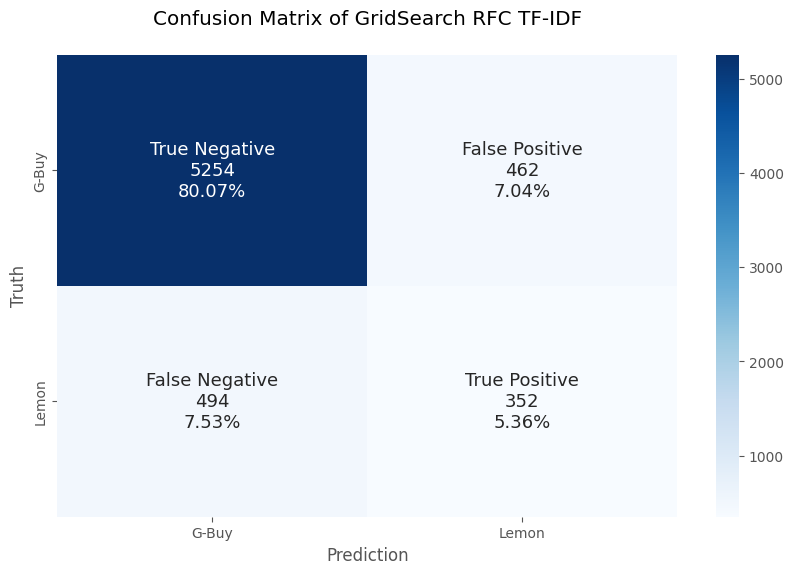

In [32]:
print('Scoring of GridSearch RFC TFIDF')
display(grid_rfc_tfidf_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_Tfidf_rfc_grid, 'GridSearch RFC TF-IDF');

#### Final RFC 

Scoring of GridSearch RFC


Model,F1 Score,Recall,Precision,Accuracy
Optimised RFC,0.431006,0.463357,0.402878,0.842274


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


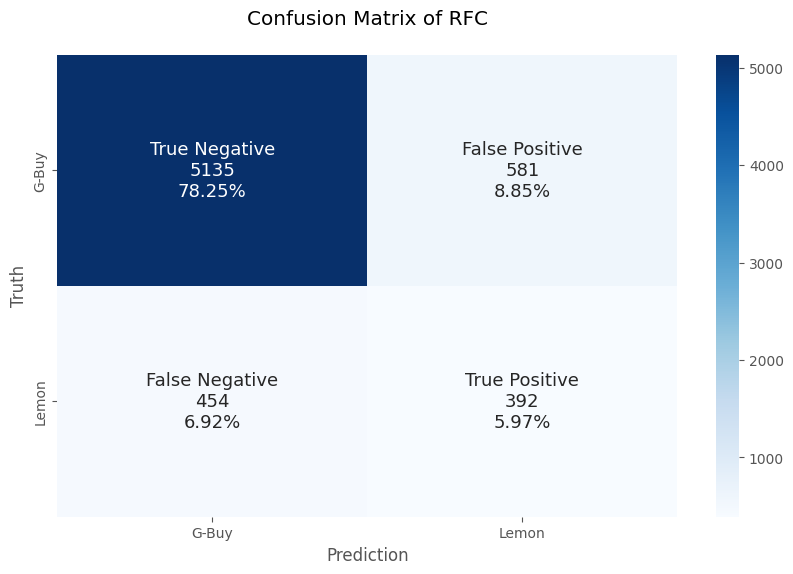

In [81]:
poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                     ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                              ('IDF', TfidfVectorizer(), 'Model_SubModel')
                                              ])

rfc                       = RandomForestClassifier(class_weight      = 'balanced',
                                                   random_state      = 442, 
                                                   n_estimators      = 100,
                                                   max_depth         = 37,
                                                   min_samples_leaf  = 7,    
                                                   min_samples_split = 3
                                                  )

pipeline_rfc_best          = Pipeline([('preprocessor', preprocessor),
                                       ('rfClassifier', rfc)
                                       ])


pipeline_rfc_best.fit(X_train_copy, y_train)                                       # X_train_rs, y_train_rs


pred_rfc_best        = pipeline_rfc_best.predict(X_test_copy) 
f1_rfc_best          = f1_score(y_test       , pred_rfc_best)
recall_rfc_best      = recall_score(y_test   , pred_rfc_best)
precision_rfc_best   = precision_score(y_test, pred_rfc_best)
accuracy_rfc_best    = accuracy_score(y_test , pred_rfc_best)


rfc_metrics_best     = pd.DataFrame({
                                    'Model'    : ['Optimised RFC'],
                                    'F1 Score' : [f1_rfc_best],
                                    'Recall'   : [recall_rfc_best],
                                    'Precision': [precision_rfc_best],
                                    'Accuracy' : [accuracy_rfc_best]
                                    })

print('Scoring of GridSearch RFC')
display(rfc_metrics_best.style.hide())
print('-- '*30)
Confusion_Matrix_Func(y_test, pred_rfc_best, 'RFC');

Same model as above just with CountVectorizer

Scoring of GridSearch RFC


Model,F1 Score,Recall,Precision,Accuracy
Optimised RFC,0.421233,0.436170,0.407285,0.845474


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


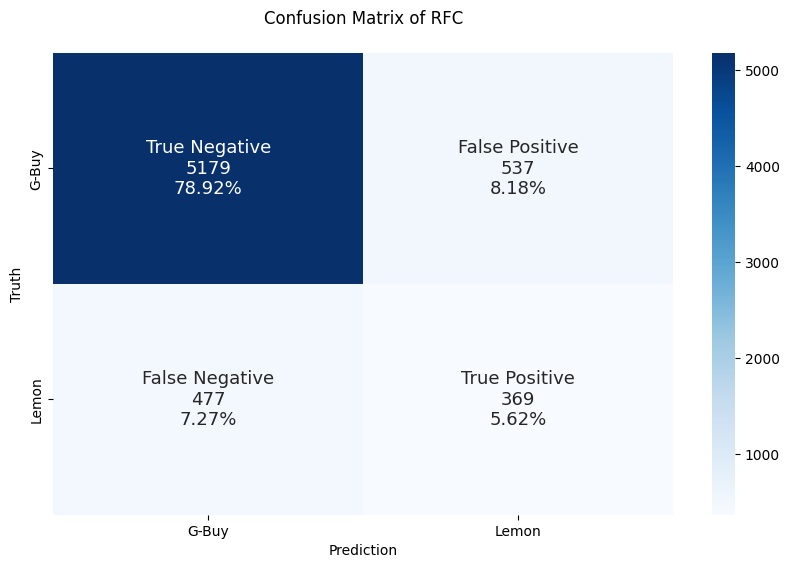

In [11]:
poly_pca_pipe             = Pipeline([('poly'  , PolynomialFeatures(degree=2)),
                                      ('scaler', StandardScaler()),
                                      ('pca'   , PCA(n_components=.99))
                                     ])

preprocessor              = ColumnTransformer([
                                              ('num', poly_pca_pipe, num_cols),
                                              ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                              ('IDF', CountVectorizer(), 'Model_SubModel')
                                              ])

rfc                       = RandomForestClassifier(class_weight      = 'balanced',
                                                   random_state      = 442, 
                                                   n_estimators      = 100,
                                                   max_depth         = 37,
                                                   min_samples_leaf  = 6,    
                                                   min_samples_split = 3
                                                  )

pipeline_rfc_best          = Pipeline([('preprocessor', preprocessor),
                                       ('rfClassifier', rfc)
                                       ])


pipeline_rfc_best.fit(X_train_copy, y_train)                                       # X_train_rs, y_train_rs


pred_rfc_best        = pipeline_rfc_best.predict(X_test_copy) 
f1_rfc_best          = f1_score(y_test       , pred_rfc_best)
recall_rfc_best      = recall_score(y_test   , pred_rfc_best)
precision_rfc_best   = precision_score(y_test, pred_rfc_best)
accuracy_rfc_best    = accuracy_score(y_test , pred_rfc_best)


rfc_metrics_best     = pd.DataFrame({
                                    'Model'    : ['Optimised RFC'],
                                    'F1 Score' : [f1_rfc_best],
                                    'Recall'   : [recall_rfc_best],
                                    'Precision': [precision_rfc_best],
                                    'Accuracy' : [accuracy_rfc_best]
                                    })

print('Scoring of GridSearch RFC')
display(rfc_metrics_best.style.hide())
print('-- '*30)
Confusion_Matrix_Func(y_test, pred_rfc_best, 'RFC');